In [1]:
from pyomo.environ import *

In [2]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
import numpy as np

In [4]:
from pyomo.opt import SolverFactory

##### sets

In [5]:
t_hours = ['t1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't10', 't11', 't12', 't13', 't14', 't15', 't16', 't17', 't18', 't19', 't20', 't21', 't22', 't23', 't24']
t_hours #time period

['t1',
 't2',
 't3',
 't4',
 't5',
 't6',
 't7',
 't8',
 't9',
 't10',
 't11',
 't12',
 't13',
 't14',
 't15',
 't16',
 't17',
 't18',
 't19',
 't20',
 't21',
 't22',
 't23',
 't24']

In [6]:
type(t_hours)

list

In [7]:
g_units = ['p1', 'p2', 'p3', 'p4']  # the power system has 4 thermal power stations
g_units

['p1', 'p2', 'p3', 'p4']

In [8]:
type(g_units)

list

##### constants (dictionary form)

In [9]:
# a is in $ / MW^2   . fuel cost coefficient for a thermal unit
# b is in $ / MW       fuel cost coefficient for a thermal unit
# c is in $            fuel cost coefficient for a thermal unit
# d is in kg CO2 / MW^2    emissions coefficient for a thermal unit
# e is in kg CO2 / MW      emissions coefficient for a thermal unit
# f is in kg CO2          emissions coefficient for a thermal unit
# Pmin, Pmax are in MW.  Min and Max output limits for a thermal unit
# RU, RD are in MW       Ramp up / down rates for a thermal unit

#this is a dictionary . The key is a tuple. 

gendata = {
    ('p1', 'a'): 0.12, 
    ('p1', 'b'): 14.80, 
    ('p1', 'c'):  89, 
    ('p1', 'd'): 1.2, 
    ('p1', 'e'): -5.00, 
    ('p1', 'f'): 3.00, 
    ('p1', 'Pmin'): 28, 
    ('p1', 'Pmax'): 200, 
    ('p1', 'RU0'): 40, 
    ('p1', 'RD0'): 40,
    
    ('p2', 'a'): 0.17, 
    ('p2', 'b'): 16.57, 
    ('p2', 'c'):  83, 
    ('p2', 'd'): 2.3, 
    ('p2', 'e'): -4.24, 
    ('p2', 'f'): 6.09, 
    ('p2', 'Pmin'): 20, 
    ('p2', 'Pmax'): 290, 
    ('p2', 'RU0'): 30, 
    ('p2', 'RD0'): 30,
    
    ('p3', 'a'): 0.15, 
    ('p3', 'b'): 15.55, 
    ('p3', 'c'): 100, 
    ('p3', 'd'): 1.1, 
    ('p3', 'e'): -2.15, 
    ('p3', 'f'): 5.69, 
    ('p3', 'Pmin'): 30, 
    ('p3', 'Pmax'): 190, 
    ('p3', 'RU0'): 30, 
    ('p3', 'RD0'): 30,
    
    ('p4', 'a'): 0.19, 
    ('p4', 'b'): 16.21, 
    ('p4', 'c'):  70, 
    ('p4', 'd'): 1.1, 
    ('p4', 'e'): -3.99, 
    ('p4', 'f'): 6.20, 
    ('p4', 'Pmin'): 20, 
    ('p4', 'Pmax'): 260, 
    ('p4', 'RU0'): 50, 
    ('p4', 'RD0'): 50
}

gendata

{('p1', 'a'): 0.12,
 ('p1', 'b'): 14.8,
 ('p1', 'c'): 89,
 ('p1', 'd'): 1.2,
 ('p1', 'e'): -5.0,
 ('p1', 'f'): 3.0,
 ('p1', 'Pmin'): 28,
 ('p1', 'Pmax'): 200,
 ('p1', 'RU0'): 40,
 ('p1', 'RD0'): 40,
 ('p2', 'a'): 0.17,
 ('p2', 'b'): 16.57,
 ('p2', 'c'): 83,
 ('p2', 'd'): 2.3,
 ('p2', 'e'): -4.24,
 ('p2', 'f'): 6.09,
 ('p2', 'Pmin'): 20,
 ('p2', 'Pmax'): 290,
 ('p2', 'RU0'): 30,
 ('p2', 'RD0'): 30,
 ('p3', 'a'): 0.15,
 ('p3', 'b'): 15.55,
 ('p3', 'c'): 100,
 ('p3', 'd'): 1.1,
 ('p3', 'e'): -2.15,
 ('p3', 'f'): 5.69,
 ('p3', 'Pmin'): 30,
 ('p3', 'Pmax'): 190,
 ('p3', 'RU0'): 30,
 ('p3', 'RD0'): 30,
 ('p4', 'a'): 0.19,
 ('p4', 'b'): 16.21,
 ('p4', 'c'): 70,
 ('p4', 'd'): 1.1,
 ('p4', 'e'): -3.99,
 ('p4', 'f'): 6.2,
 ('p4', 'Pmin'): 20,
 ('p4', 'Pmax'): 260,
 ('p4', 'RU0'): 50,
 ('p4', 'RD0'): 50}

In [10]:
type(gendata)

dict

In [11]:
gendata[('p1','a')] #this is how we print a value

0.12

In [12]:
data = {
    ('t1', 'load'):  510, 
    ('t2', 'load'):  530, 
    ('t3', 'load'):  516, 
    ('t4', 'load'):  510,  
    ('t5', 'load'):  515,  
    ('t6', 'load'):  544,  
    ('t7', 'load'):  646,  
    ('t8', 'load'):  686,  
    ('t9', 'load'):  741,  
    ('t10', 'load'): 734,  
    ('t11', 'load'): 748,  
    ('t12', 'load'): 760,  
    ('t13', 'load'): 754,  
    ('t14', 'load'): 700,  
    ('t15', 'load'): 686,  
    ('t16', 'load'): 720,  
    ('t17', 'load'): 714,  
    ('t18', 'load'): 761,  
    ('t19', 'load'): 727,  
    ('t20', 'load'): 714,  
    ('t21', 'load'): 618, 
    ('t22', 'load'): 584,  
    ('t23', 'load'): 578,  
    ('t24', 'load'): 544,  
}

In [13]:
type(data)

dict

## defining the optimization model

In [14]:
model = ConcreteModel()
model

In [15]:
model.name= "Cost-based DED"

##### adding the sets to the model

In [16]:
model.t_hours = Set(initialize=t_hours)

In [17]:
model.g_units = Set(initialize=g_units)

##### Decision Variables

Syntax of Var: <br>
    First are the index sets. Eg for model.p we have two index sets: g_units and t_hours. <br>
    Then we set the upper and the lower bounds on the variable. Eg for Pd these are 0 and 20% of SOCmax.
         <br> Also for p the bounds are Pmin and Pmax. We write bounds = lambda model, followed by the indices of the index sets.

output of a thermal unit in MW:

In [18]:
model.p = Var(model.g_units, model.t_hours, bounds=lambda model, g, t: ( gendata[g, 'Pmin'], gendata[g, 'Pmax'] ) )

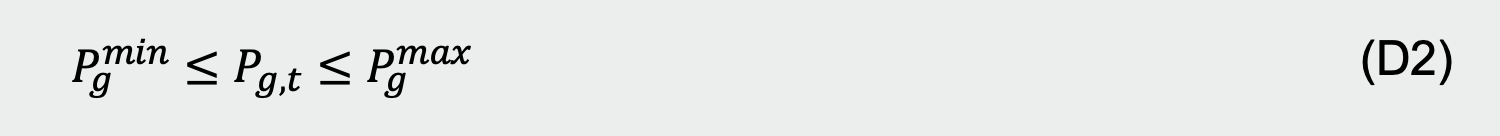

In [19]:
gendata['p1', 'Pmin']

28

##### objective function. We minimize the Total electricity generation Cost (TC). This is a quadratic objective function ie nonlinear problem

In [20]:
gendata['p1','a']

0.12

In [21]:
model.costThermal = Objective(
    expr=sum(gendata[g, 'a'] * model.p[g, t]**2 + gendata[g, 'b'] * model.p[g, t] + gendata[g, 'c']
             for t in model.t_hours for g in model.g_units),
    sense=minimize
)

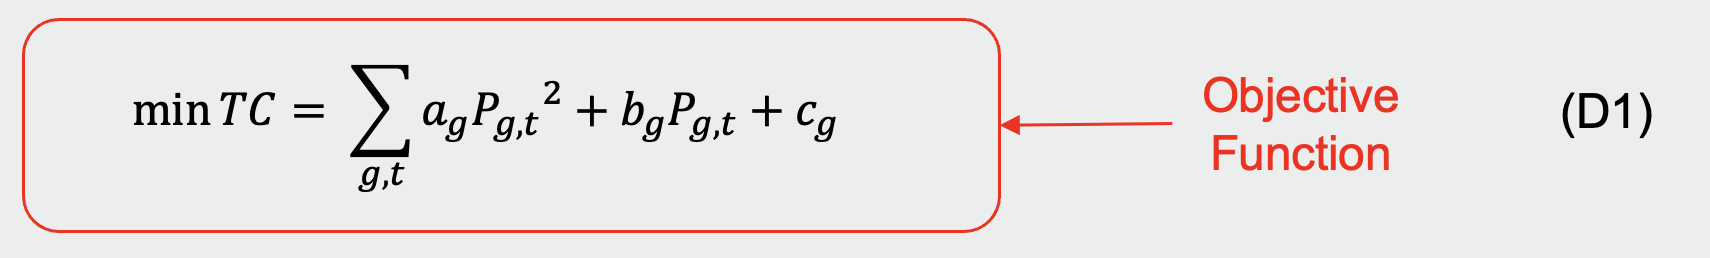

##### constraints

In [22]:
def Genconst_rule(model, g, t):
    if t == 't24':
        return Constraint.Skip
    else:
        return model.p[g, t_hours[t_hours.index(t) + 1]]  - model.p[g, t] <= gendata[g, 'RU0']

In [23]:
model.Genconst3 = Constraint(
    model.g_units, 
    model.t_hours, 
    rule=Genconst_rule)

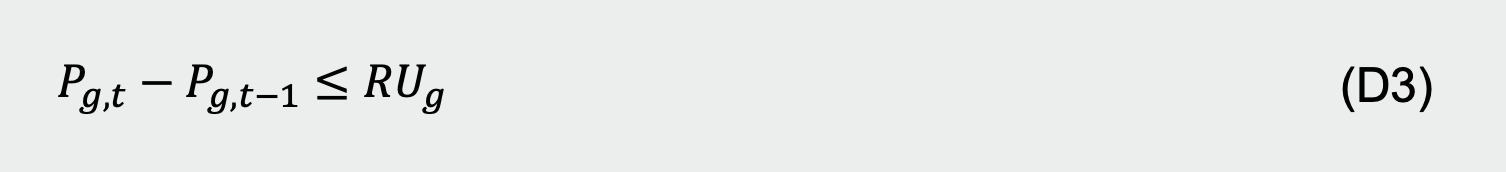

example: at period t='t1' . And for the unit 'p1'
    
    model.p['p1', 't1'] - model.p['g1', t_hours[t_hours.index('t1')-1 ]] <= gendata['p1', 'RUO']

In [24]:
gendata['p1','RU0']

40

In [25]:
t_hours.index('t1')

0

So it becomes:

        model.p['p1', 't1'] - model.p['g1', t_hours[0-1 ]] <= 40 MW

In [26]:
t_hours[-1]

't24'

So essentially our t0 is t24. This is an assumption since we dont have data for t0.

reminder:

In [27]:
g_units

['p1', 'p2', 'p3', 'p4']

In [28]:
t_hours

['t1',
 't2',
 't3',
 't4',
 't5',
 't6',
 't7',
 't8',
 't9',
 't10',
 't11',
 't12',
 't13',
 't14',
 't15',
 't16',
 't17',
 't18',
 't19',
 't20',
 't21',
 't22',
 't23',
 't24']

In [29]:
t_hours.index('t2')

1

In [30]:
t_hours[0]

't1'

In [31]:
model.Genconst4 = Constraint(
    model.g_units, 
    model.t_hours, 
    rule=lambda model, g, t: model.p[g, t_hours[t_hours.index(t) - 1]] - model.p[g, t] <= gendata[g, 'RD0'])

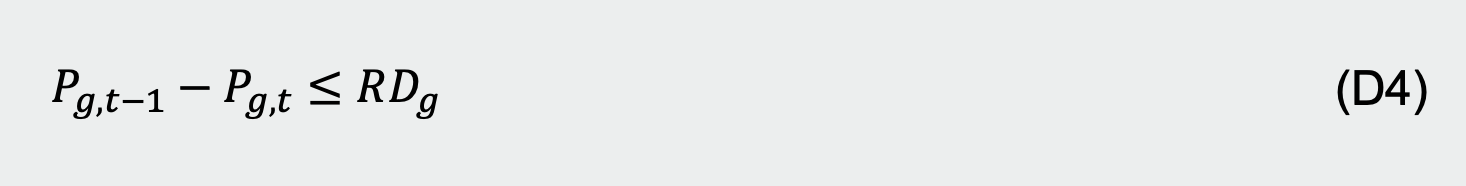

Reminders:

In [32]:
t_hours

['t1',
 't2',
 't3',
 't4',
 't5',
 't6',
 't7',
 't8',
 't9',
 't10',
 't11',
 't12',
 't13',
 't14',
 't15',
 't16',
 't17',
 't18',
 't19',
 't20',
 't21',
 't22',
 't23',
 't24']

In [33]:
t_hours.index('t1')

0

In [34]:
t_hours[0- 1]

't24'

power balance equation: 

The electricity generation from all power stations plus the discharge of the storage

must be equal to the demand Lt PLUS the charge of the storage.

In [35]:
model.balance = Constraint(
    model.t_hours, 
    rule=lambda model, t: sum(model.p[g, t] for g in model.g_units) == data[t, 'load'])

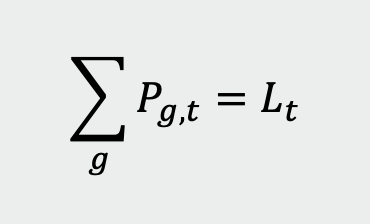

In [36]:
model.EM = Var(bounds=(0, None))

In [37]:
model.EMcalc = Constraint(
    rule=lambda model: model.EM == sum(gendata[g, 'd'] * model.p[g, t]**2 + gendata[g, 'e'] * model.p[g, t] + gendata[g, 'f'] 
                          for t in model.t_hours for g in model.g_units))


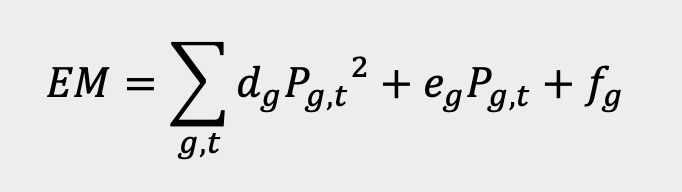

## Solving the problem

how to install:
    1.go to gurobi.com
    2. Register and then login
    3. Go to 'downloads and licenses' --> downloads center --> gurobi optimizer--> accept user license agreement
    4. download the installer and install it

In [38]:
solver = SolverFactory('gurobi') 

In [39]:
solver.options['NonConvex'] = 2

## Results

In [40]:
results1 = solver.solve(model)

In [41]:
type(results1)

pyomo.opt.results.results_.SolverResults

In [42]:
results1

{'Problem': [{'Name': 'x1', 'Lower bound': 647946.6896412731, 'Upper bound': 647964.4601173822, 'Number of objectives': 1, 'Number of constraints': 213, 'Number of variables': 98, 'Number of binary variables': 0, 'Number of integer variables': 0, 'Number of continuous variables': 98, 'Number of nonzeros': 472, 'Sense': 'minimize'}], 'Solver': [{'Status': 'ok', 'Return code': '0', 'Message': 'Model was solved to optimality (subject to tolerances), and an optimal solution is available.', 'Termination condition': 'optimal', 'Termination message': 'Model was solved to optimality (subject to tolerances), and an optimal solution is available.', 'Wall time': '0.03191518783569336', 'Error rc': 0, 'Time': 0.1443309783935547}], 'Solution': [OrderedDict([('number of solutions', 0), ('number of solutions displayed', 0)])]}

In [43]:
model.display() 

Model Cost-based DED

  Variables:
    p : Size=96, Index=p_index
        Key           : Lower : Value              : Upper : Fixed : Stale : Domain
         ('p1', 't1') :    28 : 166.19054667442649 :   200 : False : False :  Reals
        ('p1', 't10') :    28 : 199.99999999989234 :   200 : False : False :  Reals
        ('p1', 't11') :    28 :  199.9999999999075 :   200 : False : False :  Reals
        ('p1', 't12') :    28 : 199.99999999991746 :   200 : False : False :  Reals
        ('p1', 't13') :    28 : 199.99999999991275 :   200 : False : False :  Reals
        ('p1', 't14') :    28 : 199.99999999982487 :   200 : False : False :  Reals
        ('p1', 't15') :    28 :  199.9999999997898 :   200 : False : False :  Reals
        ('p1', 't16') :    28 : 199.99999999987122 :   200 : False : False :  Reals
        ('p1', 't17') :    28 : 199.99999999985943 :   200 : False : False :  Reals
        ('p1', 't18') :    28 :  199.9999999999182 :   200 : False : False :  Reals
        ('

In [44]:
solver.type

'gurobi'

In [45]:
results1['Problem'][0]['Number of objectives'] #problem has 1 objective function

1

In [46]:
results1['Problem'][0]['Lower bound']  

647946.6896412731

In [47]:
results1['Problem'][0]['Upper bound']  

647964.4601173822

In [48]:
results1['Problem'][0]['Upper bound']  == results1['Problem'][0]['Lower bound']  #equal to each other. Convergence

False

The total operating costs are TC=  $6.4553 10^5  = $0.645 million



In [49]:
results1['Problem'][0]['Number of constraints']  

213

In [50]:
results1['Problem'][0]['Number of variables']  

98

In [51]:
results1['Problem'][0]['Number of binary variables']  

0

In [52]:
results1['Problem'][0]['Number of integer variables']  

0

In [53]:
results1['Problem'][0]['Number of continuous variables']  

98

In [54]:
results1['Problem'][0]['Sense']   #minimization problem

<ProblemSense.minimize: 'minimize'>

In [55]:
results1['Solver'][0]['Message']

'Model was solved to optimality (subject to tolerances), and an optimal solution is available.'

In [56]:
results1['Solver'][0]['Termination condition']

<TerminationCondition.optimal: 'optimal'>

In [57]:
results1['Solver'][0]['Time'] #solution time ie how much time it took to solve

0.1443309783935547

In [58]:
model.p['p1','t1'].value  #shows the optimal value ie output of p1 at t1 in MW.

166.19054667442649

In [59]:
data.values()

dict_values([510, 530, 516, 510, 515, 544, 646, 686, 741, 734, 748, 760, 754, 700, 686, 720, 714, 761, 727, 714, 618, 584, 578, 544])

In [60]:
#same as the values of the input 'data' that we defined above. This is the load in MW
L_lst = [510.00,
         530.00,
         516.00,
         510.00,
         515.00,
         544.00,
         646.00,
         686.00,
         741.00,
         734.00,
         748.00,
         760.00,
         754.00,
         700.00,
         686.00,
         720.00,
         714.00,
         761.00,
         727.00,
         714.00,
         618.00,
         584.00,
         578.00,
         544.00]

In [61]:
pg_lst = []

for t in model.t_hours:  # ['t1', 't2', etc.... 't24'] . Eg 't1'
    val = 0
    for g in model.g_units:  # ['p1', 'p2', 'p3', 'p4']
        val +=model.p[g, t].value  # we sum the output of p1, p2, p3, p4, at periot t. Ie total output per period. 
    
    pg_lst.append(round(val, 2))

In [62]:
pg_lst #total output (MW) per our

[510.0,
 530.0,
 516.0,
 510.0,
 515.0,
 544.0,
 646.0,
 686.0,
 741.0,
 734.0,
 748.0,
 760.0,
 754.0,
 700.0,
 686.0,
 720.0,
 714.0,
 761.0,
 727.0,
 714.0,
 618.0,
 584.0,
 578.0,
 544.0]

In [63]:
list1 = [ L_lst, pg_lst] 
array1 = np.array(list1) #the list is now converted to an array
dataframe1 = pd.DataFrame(array1) #the array is converted to a dataframe
dataframe1

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,510.0,530.0,516.0,510.0,515.0,544.0,646.0,686.0,741.0,734.0,...,686.0,720.0,714.0,761.0,727.0,714.0,618.0,584.0,578.0,544.0
1,510.0,530.0,516.0,510.0,515.0,544.0,646.0,686.0,741.0,734.0,...,686.0,720.0,714.0,761.0,727.0,714.0,618.0,584.0,578.0,544.0


In [64]:
data_tables = dataframe1.T  #we transpose it ie its rows become columns, and its columns become rows.


In [65]:
data_tables

,0,1
0,510.0,510.0
1,530.0,530.0
2,516.0,516.0
3,510.0,510.0
4,515.0,515.0
5,544.0,544.0
6,646.0,646.0
7,686.0,686.0
8,741.0,741.0
9,734.0,734.0


In [66]:
data_tables.index = range(1,25)  # we set the row index ie the names of the rows, to be 1...24

In [67]:
data_tables

,0,1
1,510.0,510.0
2,530.0,530.0
3,516.0,516.0
4,510.0,510.0
5,515.0,515.0
6,544.0,544.0
7,646.0,646.0
8,686.0,686.0
9,741.0,741.0
10,734.0,734.0


In [68]:
data_tables.columns = ["Lt","P'g"]
data_tables

,Lt,P'g
1,510.0,510.0
2,530.0,530.0
3,516.0,516.0
4,510.0,510.0
5,515.0,515.0
6,544.0,544.0
7,646.0,646.0
8,686.0,686.0
9,741.0,741.0
10,734.0,734.0


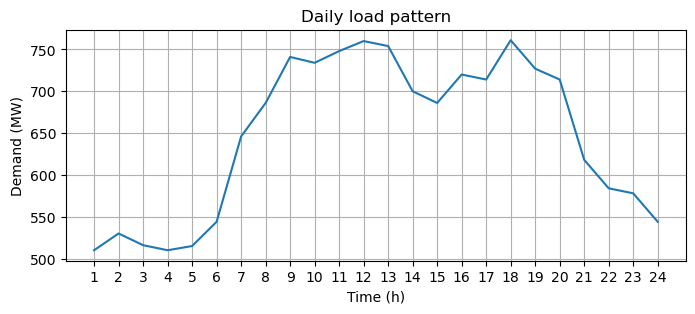

In [69]:
plt.figure(figsize=(8, 3))
plt.plot(t_hours, L_lst, '-')

plt.xlabel('Time (h)')
plt.ylabel('Demand (MW)')
plt.title('Daily load pattern')
xticks = range(1,25)
plt.xticks(t_hours, xticks)
plt.grid()
plt.show()

In [70]:
g1_values = [model.p['p1', t].value for t in model.t_hours]
g2_values = [model.p['p2', t].value for t in model.t_hours]
g3_values = [model.p['p3', t].value for t in model.t_hours]
g4_values = [model.p['p4', t].value for t in model.t_hours]

In [71]:
type(g1_values)

list

In [72]:
g1_values #output in MW from the first power station.

[166.19054667442649,
 172.56512729412404,
 168.10292086035258,
 166.19054667445047,
 167.78419182936702,
 177.02733372355206,
 199.9999999995088,
 199.9999999997898,
 199.9999999999005,
 199.99999999989234,
 199.9999999999075,
 199.99999999991746,
 199.99999999991275,
 199.99999999982487,
 199.9999999997898,
 199.99999999987122,
 199.99999999985943,
 199.9999999999182,
 199.99999999988273,
 199.99999999986755,
 198.03420630419657,
 189.77649496698595,
 187.86412078119105,
 177.02733372789575]

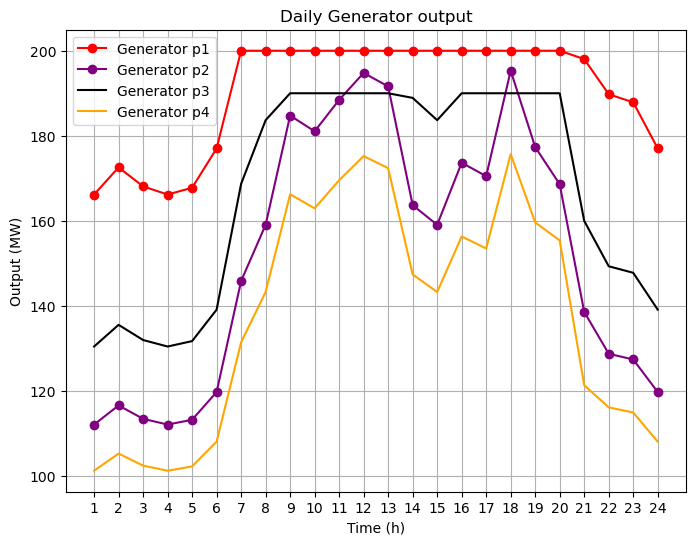

In [73]:
plt.figure(figsize=(8, 6))
plt.plot(t_hours, g1_values, 'o-', color='red', label='Generator p1')
plt.plot(t_hours, g2_values, 'o-', color='purple',label='Generator p2')
plt.plot(t_hours, g3_values, '-',  color='black',   label='Generator p3')
plt.plot(t_hours, g4_values, '-',  color='orange', label='Generator p4')
plt.xlabel('Time (h)')
plt.ylabel('Output (MW)')
plt.title('Daily Generator output')
plt.xticks(t_hours, xticks)
plt.legend()
plt.grid()
plt.show()